## Connecting to Gemini

The Gemini API allows you to connect to Google's most powerful multi-modal model. This example configures your API key and sends an example message to the API and prints a response.

Before you start, visit https://makersuite.google.com/app/apikey to create an API key.

In [ ]:
#@title Configure Gemini API key

import google.generativeai as genai
from google.colab import userdata

gemini_api_secret_name = 'GOOGLE_API_KEY'  # @param {type: "string"}

try:
  GOOGLE_API_KEY=userdata.get(gemini_api_secret_name)
  genai.configure(api_key=GOOGLE_API_KEY)
except userdata.SecretNotFoundError as e:
   print(f'Secret not found\n\nThis expects you to create a secret named {gemini_api_secret_name} in Colab\n\nVisit https://makersuite.google.com/app/apikey to create an API key\n\nStore that in the secrets section on the left side of the notebook (key icon)\n\nName the secret {gemini_api_secret_name}')
   raise e
except userdata.NotebookAccessError as e:
  print(f'You need to grant this notebook access to the {gemini_api_secret_name} secret in order for the notebook to access Gemini on your behalf.')
  raise e
except Exception as e:
  # unknown error
  print(f"There was an unknown error. Ensure you have a secret {gemini_api_secret_name} stored in Colab and it's a valid key from https://makersuite.google.com/app/apikey")
  raise e

In [ ]:
import pathlib
import textwrap
import google.generativeai as genai
from google.colab import userdata
from IPython.display import display
from IPython.display import Markdown
import PIL.Image
import google.ai.generativelanguage as glm

In [ ]:
def to_markdown(text):
  text = text.replace('•', '  *')
  return Markdown(textwrap.indent(text, '> ', predicate=lambda _: True))

In [ ]:
GOOGLE_API_KEY=userdata.get('GOOGLE_API_KEY')

genai.configure(api_key=GOOGLE_API_KEY)

In [ ]:
for m in genai.list_models():
  if 'generateContent' in m.supported_generation_methods:
    print(m.name)

models/gemini-1.0-pro
models/gemini-1.0-pro-001
models/gemini-1.0-pro-latest
models/gemini-1.0-pro-vision-latest
models/gemini-1.5-pro-latest
models/gemini-pro
models/gemini-pro-vision


In [ ]:
model = genai.GenerativeModel('gemini-pro')

In [ ]:
%%time
response = model.generate_content("What is Quantum Machine Learning")   #Markov Chain Rule

CPU times: user 125 ms, sys: 18.4 ms, total: 144 ms
Wall time: 8.1 s


In [ ]:
to_markdown(response.text)

> **Quantum Machine Learning (QML)** is a rapidly emerging field that combines the principles of quantum computing with machine learning algorithms. By leveraging the inherent parallelism and superposition capabilities of quantum systems, QML aims to develop novel and more efficient machine learning models with applications in various domains.
> 
> **Key Concepts:**
> 
> * **Quantum Computing:** QML utilizes quantum systems, such as qubits, to perform computations. Qubits can exist in a superposition of states, allowing for the simultaneous exploration of multiple possibilities.
> * **Parallelism:** Quantum systems can execute multiple operations simultaneously, making them suitable for parallel processing of data.
> * **Quantum Gates:** Operations on quantum systems are represented by quantum gates, which can manipulate the state of qubits according to specific rules.
> * **Quantum Algorithms:** QML algorithms are designed specifically to take advantage of the unique properties of quantum systems.
> 
> **Advantages of QML:**
> 
> * **Faster Training and Inference:** Quantum algorithms can potentially train models more efficiently than classical algorithms, due to the increased parallelism.
> * **Improved Model Accuracy:** Quantum systems can explore a broader range of solutions, potentially leading to improved model accuracy.
> * **Novel Applications:** QML opens up new possibilities for machine learning applications, such as quantum simulation, materials discovery, and cryptography.
> 
> **Applications of QML:**
> 
> * **Quantum Chemistry:** Predicting the properties of molecules and materials.
> * **Drug Discovery:** Identifying potential drug candidates for disease treatment.
> * **Optimization:** Solving complex optimization problems with high dimensionality.
> * **Natural Language Processing:** Enhancing text classification and language translation tasks.
> * **Financial Modeling:** Predicting financial market trends and risk assessments.
> 
> **Challenges of QML:**
> 
> * **Hardware Limitations:** Current quantum hardware is still limited in terms of qubits and noise levels.
> * **Algorithm Development:** Designing efficient quantum algorithms for machine learning tasks remains an active area of research.
> * **Software Tools:** Developing user-friendly software tools for QML is essential for adoption.
> 
> **Conclusion:**
> 
> Quantum Machine Learning is a promising field that has the potential to revolutionize machine learning and its applications. However, significant challenges need to be addressed before QML can fully mature. As quantum hardware and software advance, QML is expected to play an increasingly important role in various domains, including science, medicine, finance, and beyond.

In [ ]:
!curl -o image.jpg https://i.pinimg.com/736x/d0/0b/f8/d00bf86933543a764c971cca785fdc32.jpg

  % Total    % Received % Xferd  Average Speed   Time    Time     Time  Current
                                 Dload  Upload   Total   Spent    Left  Speed
100 82583  100 82583    0     0   297k      0 --:--:-- --:--:-- --:--:--  298k


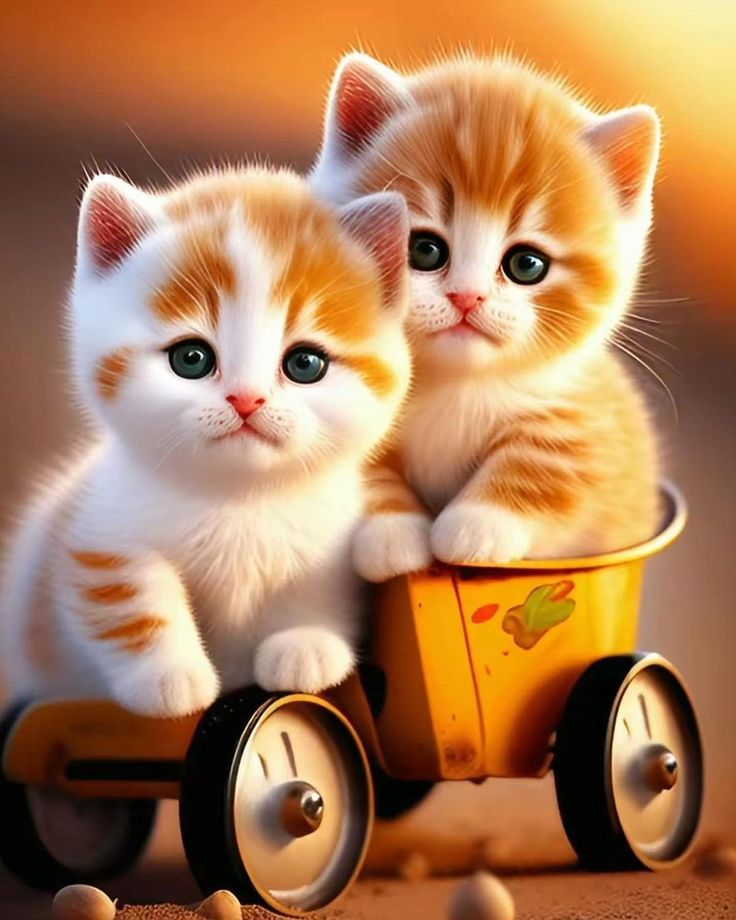

In [ ]:
img = PIL.Image.open('image.jpg')
img

In [ ]:
model = genai.GenerativeModel('gemini-pro-vision')

In [ ]:
response = model.generate_content(img)

to_markdown(response.text)

>  The picture shows two cute kittens sitting in a toy car. The kittens are both orange and white, and they have big green eyes. They are looking at the camera with curious expressions. The car is yellow and has four wheels. The kittens are sitting on the seat of the car, and they look like they are having a lot of fun. The background is a blur of orange and yellow, and it looks like the sun is setting. The picture is very cute and heartwarming, and it is sure to make anyone smile.

In [ ]:
response = model.generate_content(["Write a short, engaging blog post based on this picture.It should include the description about how cats are friendly with human beings for being pet.", img], stream=True)
response.resolve()
to_markdown(response.text)

>  Cats are one of the most popular pets in the world, and for good reason. They are independent, affectionate, and intelligent creatures that make great companions. One of the things that makes cats so special is their ability to form strong bonds with humans. Cats are naturally curious and playful, and they love to interact with people. They are also very affectionate, and they enjoy being petted and cuddled.
> 
> There are many benefits to having a cat as a pet. Cats can provide companionship, reduce stress, and even improve your health. If you are looking for a loving and loyal companion, a cat may be the perfect pet for you.
> 
> Here are some tips for building a strong bond with your cat:
> 
> * Spend time with your cat each day. Play with them, brush their fur, or just sit and talk to them.
> * Be affectionate with your cat. Pet them, cuddle with them, and let them know that you love them.
> * Respect your cat's boundaries. Don't force them to do anything they don't want to do.
> * Provide your cat with a safe and comfortable home. Make sure they have a place to sleep, eat, and play.
> * Take your cat to the vet for regular checkups. This will help keep them healthy and happy.
> 
> By following these tips, you can build a strong and lasting bond with your cat.